100%|██████████| 26421880/26421880 [00:15<00:00, 1724712.96it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 88750.63it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:13<00:00, 336124.97it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9275033.07it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/5], Step [1/938], Loss: 2.3232
Epoch [2/5], Step [1/938], Loss: 0.5012
Epoch [3/5], Step [1/938], Loss: 0.4562
Epoch [4/5], Step [1/938], Loss: 0.5062
Epoch [5/5], Step [1/938], Loss: 0.3944
Training finished
Accuracy of the network on the 10000 test images: 83.91%


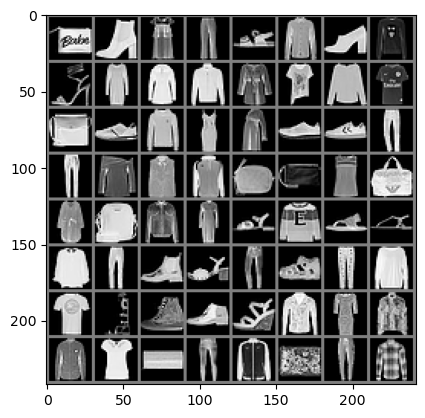

  Bag Ankle boot Dress Trouser Sandal Shirt Ankle boot Pullover Sandal Dress  Coat  Coat Shirt T-shirt/top Shirt T-shirt/top   Bag Sneaker Pullover Dress Dress Sneaker Sneaker Trouser Trouser Shirt Shirt  Coat   Bag   Bag T-shirt/top   Bag Dress   Bag Shirt Dress Sandal Pullover Sandal Sandal Shirt Trouser Ankle boot Sandal Trouser Sandal Trouser Pullover T-shirt/top Sandal Sneaker Ankle boot Sandal  Coat Dress Shirt Shirt T-shirt/top   Bag Trouser  Coat   Bag Trouser Shirt
Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
Model saved
Model loaded
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [1]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as v2
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define transformations for the dataset
transform = v2.Compose([
    v2.ToTensor(),  # Convert images to tensors
    v2.Normalize((0.5,), (0.5,))  # Normalize the pixel values to range [-1, 1]
])

# Step 2: Load the FashionMNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Step 3: Create data loaders to load data in batches
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# Step 4: Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Step 5: Instantiate the neural network model
model = NeuralNetwork()

# Step 6: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Step 7: Train the model
num_epochs = 5
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 1000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}], Loss: {loss.item():.4f}')

print('Training finished')

# Step 8: Test the trained model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

# Step 9: Print images and tensors
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
images, labels = next(iter(trainloader))

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % trainset.classes[labels[j]] for j in range(batch_size)))

# Print tensors
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)


# Step 10: Save the model
torch.save(model.state_dict(), 'fashion_mnist_model.pth')
print('Model saved')

# Step 11: Load the model
model = NeuralNetwork()
model.load_state_dict(torch.load('fashion_mnist_model.pth'))
model.eval()
print('Model loaded')
print(model)
